<a href="https://colab.research.google.com/github/kalkairis/intro_to_python/blob/main/2_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Visualization**
We will learn how to create basic plots using Matplotlib, Pandas visualization and Seaborn as well as how to use some specific features of each library. 

The tutorial is based on [link](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed).

You can find many beautiful graphs and visualization examples in the [python graph gallery](https://python-graph-gallery.com). Just choose whatever graph best describe your data, copy the code generating it and change it to present your own data!

Here we load the first dataset using pandas.  
Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming

In [ ]:
import pandas as pd

In [ ]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews = pd.read_csv('https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Have a look at your dataset

In [ ]:
print('There are', iris.shape[0], 'data points in the iris dataset')
print(f'There are {wine_reviews.shape[0]:,} data points in the wine reviews dataset')

There are 150 data points in the iris dataset
There are 129,971 data points in the wine reviews dataset


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
wine_summary = pd.DataFrame([(c, group.shape[0], len(group.winery.unique()), group.points.mean()) 
                             for c, group in wine_reviews.groupby(['country'])], 
                            columns=['country', 'wines_number', 'wineries', 'avrgae points'])

wine_summary.sort_values('avrgae points', ascending=False, inplace=True)
wine_summary.head(10)

,country,wines_number,wineries,avrgae points
14,England,74,17,91.581081
20,India,9,1,90.222222
3,Austria,3345,228,90.101345
17,Germany,2165,256,89.851732
7,Canada,257,45,89.369650
19,Hungary,146,41,89.191781
9,China,1,1,89.000000
15,France,22093,3864,88.845109
24,Luxembourg,6,2,88.666667
2,Australia,2329,474,88.580507


In [ ]:
israeli_wineries = wine_reviews[wine_reviews.country == 'Israel'].winery.unique()
israeli_wineries = sorted(israeli_wineries)

print('Israeli wineries:')
print(israeli_wineries)

Israeli wineries:
['1848 Winery', 'Agur', 'Alexander', 'Barkan', 'Bazelet HaGolan', 'Binyamina', 'Carmel', 'Clos de Gat', 'Dalton', 'Domaine Netofa', 'Domaine du Castel', 'Dovev', 'Flam', 'Galil Mountain', 'Gamla', 'Golan Heights Winery', "Gva'ot", 'Hacormim', 'Hevron Heights Winery', 'Jacques Capsouto', 'Jerusalem Wineries', 'Jezreel', 'Kadesh Barnea', 'Katlav', 'Madmon', 'Makura Estate', 'Margalit', 'Montefiore', 'Mony', 'Odem Mountain', 'Or Haganuz', 'Pelter', 'Psagot', 'Recanati', "Segal's", 'Shiloh Winery', 'Shvo', 'Tabor', 'Teperberg', 'The Cave', 'Titora', 'Tulip Winery', 'Tzuba', 'Vitkin', 'Yaffo', 'Yatir', 'Zion Fine Wines']


# **Matplotlib**
Matplotlib is the most popular python plotting library. Matplotlib is specifically good for creating basic graphs like line charts, bar charts, histograms and many more.  
It can be imported by typing:

In [ ]:
import matplotlib.pyplot as plt

## Scatter Plot

Text(0, 0.5, 'sepal_width')

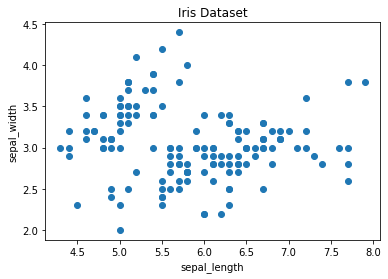

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can give the graph more meaning by coloring each data-point by its class. 

Text(0, 0.5, 'sepal_width')

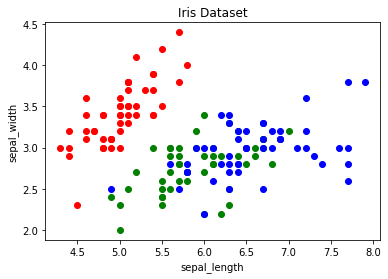

In [ ]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i, r in iris.iterrows():
    ax.scatter(r['sepal_length'], r['sepal_width'],
               color=colors[r['class']])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

## Line Chart
In Matplotlib we can create a line chart by calling the plot method. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

No handles with labels found to put in legend.


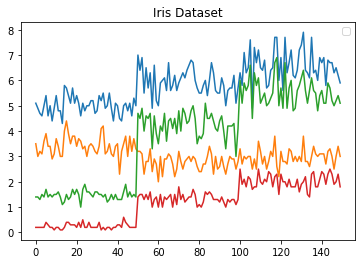

In [ ]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

## Histogram
In Matplotlib we can create a Histogram using the hist method.   
If we pass it categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

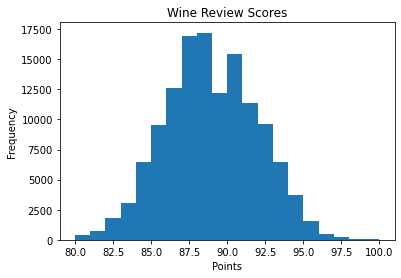

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'], bins=20)
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# **Pandas Visualization**
Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools we will use in this article.  
Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. It also has a higher level API than Matplotlib and therefore we need less code for the same results.

## Scattter plot

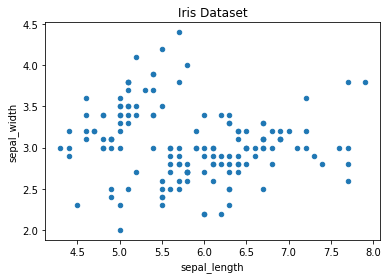

In [ ]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

As you can see in the image it is automatically setting the x and y label to the column names.

## Line Chart
To create a line-chart in Pandas we can call <dataframe>.plot.line().   
Whilst in Matplotlib we needed to loop-through each column we wanted to plot, in Pandas we don’t need to do this because it automatically plots all available numeric columns.

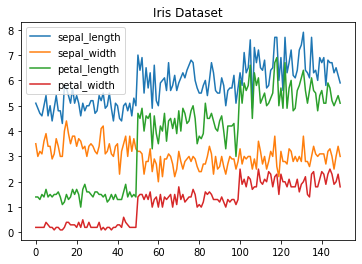

In [ ]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].plot.line(title='Iris Dataset')

If we have more than one feature Pandas automatically creates a legend for us, as can be seen in the image above.

## Histogram

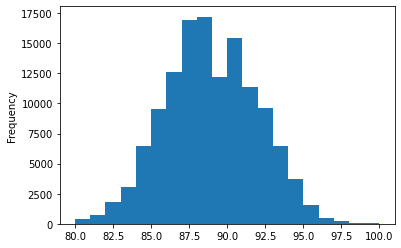

In [ ]:
wine_reviews['points'].plot.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5716cf0690>,
      dtype=object)

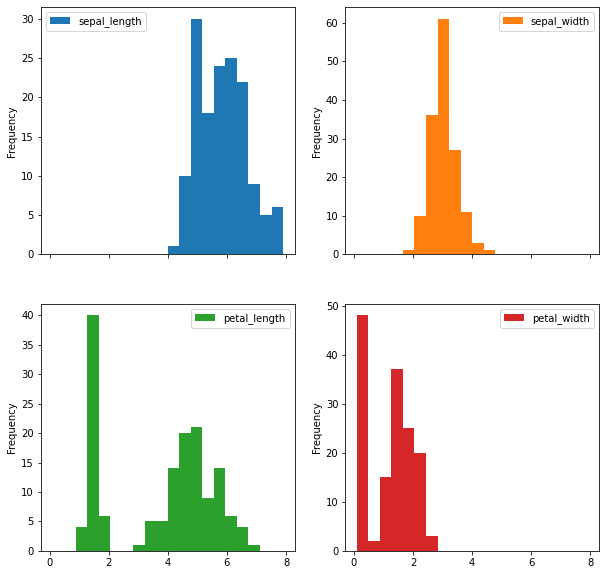

In [ ]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

We can also plot other data then the number of occurrences.


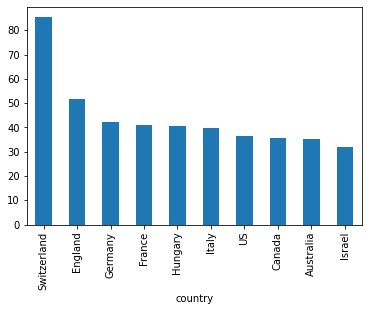

In [ ]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:10].plot.bar()

# **Seaborn**
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs.  
Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.  
It can be imported by typing:

In [ ]:
import seaborn as sns

## Scatter plot

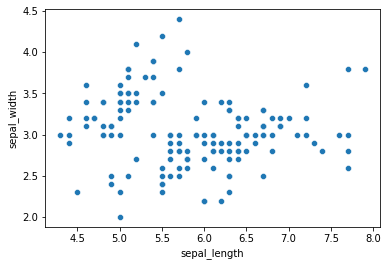

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

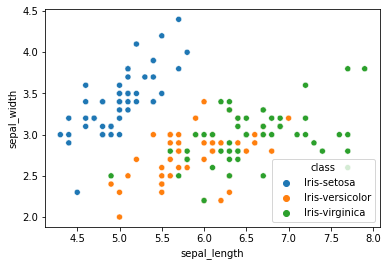

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

## Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


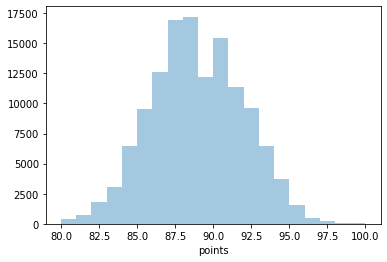

In [ ]:
sns.distplot(wine_reviews['points'], bins=20, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


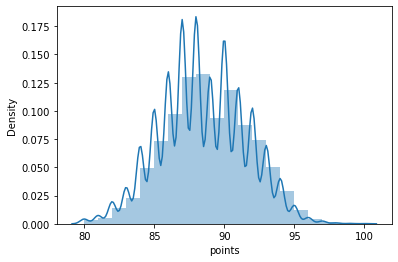

In [ ]:
sns.distplot(wine_reviews['points'], bins=20, kde=True)

## Box plots
A Box Plot is a graphical method of displaying the five-number summary:
  * The sample minimum (smallest observation)
  * The lower quartile or first quartile
  * The median (the middle value)
  * The upper quartile or third quartile
  * The sample maximum (largest observation)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


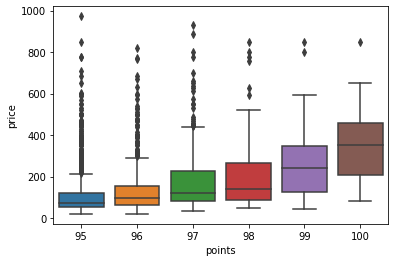

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

## Heatmap
A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.  
Heatmaps are perfect for exploring the correlation of features in a dataset.  
To get the correlation of the features inside a dataset we can call <dataset>.corr(), which is a Pandas dataframe method. This will give us the correlation matrix.

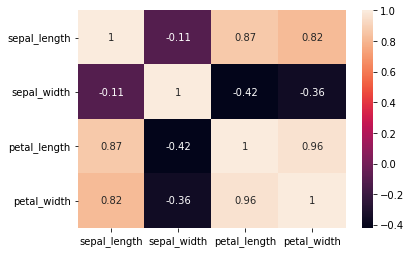

In [ ]:
sns.heatmap(iris.corr(), annot=True)

## Faceting
Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.  
Faceting is really helpful if you want to quickly explore your dataset.
To use one kind of faceting in Seaborn we can use the FacetGrid.   
First of all, we need to define the FacetGrid and pass it our data as well as a row or column, which will be used to split the data. Then we need to call the map function on our FacetGrid object and define the plot type we want to use, as well as the column we want to graph.

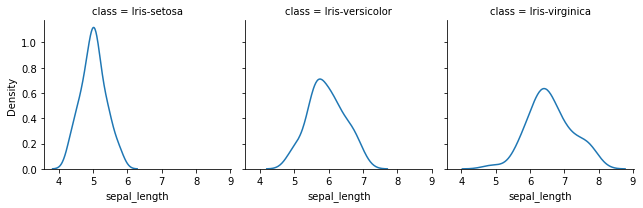

In [ ]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot
Lastly, Seaborns pairplot enable you to plot a grid of pairwise relationships in a dataset.

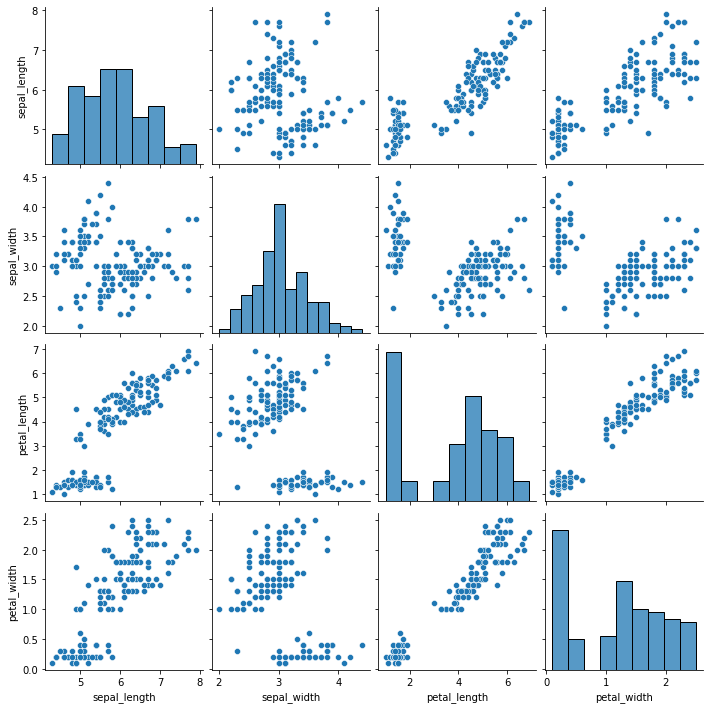

In [ ]:
sns.pairplot(iris)